In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #z-score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
#log , căn, bậc 2 3, sigmoid
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [3]:
df = pd.read_excel('mysales.xlsx',header=0)
df.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192


In [4]:
#Câu 1
df.shape

(1952, 25)

In [5]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Country', 'Region',
       'State or Province', 'City', 'Postal Code', 'Order Date', 'Ship Date',
       'Profit', 'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [6]:
df.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Country                         object
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

In [7]:
#Câu 2
len(df.select_dtypes(include='int64').columns)

5

In [8]:
#Câu 3
df['Product Base Margin'].median()

0.525

In [9]:
#Câu 4
df.rename(columns={'Order Priority':'Priority','Shipping Mode':'Mode',
                  'Unit Price':'Price','Shipping Cost':'ShipCost','Quantity ordered new':'Quantity'},inplace=True)
df[['Discount','Price','ShipCost','Quantity','Sales']].iloc[20]

Discount     0.01
Price       17.98
ShipCost     8.51
Quantity     2.00
Sales       40.17
Name: 20, dtype: float64

In [10]:
#Câu 5
from scipy.stats import skew
# print(skew(df['Price']))
# print(skew(df['Discount']))
# print(skew(df['Quantity']))
# print(skew(df['ShipCost']))
# print(skew(df['Sales']))
max(
    skew(df['Price']),
    skew(df['Discount']),
    skew(df['Quantity']),
    skew(df['ShipCost']),
    skew(df['Sales'])
)

12.130107305683449

In [11]:
#Câu 6
correlation_matrix = df[['Discount', 'Price','ShipCost', 'Sales','Quantity']].corr(method='pearson')
correlation_matrix

,Discount,Price,ShipCost,Sales,Quantity
Discount,1.000000,-0.008202,0.039908,-0.030287,-0.009398
Price,-0.008202,1.000000,0.198793,0.443509,-0.072472
ShipCost,0.039908,0.198793,1.000000,0.322133,-0.009735
Sales,-0.030287,0.443509,0.322133,1.000000,0.303099
Quantity,-0.009398,-0.072472,-0.009735,0.303099,1.000000


In [12]:
correlation_values = correlation_matrix.values.flatten()
correlation_values = correlation_values[correlation_values != 1]
closest_to_zero = min(correlation_values, key=abs)
indices = np.where((correlation_matrix.values == closest_to_zero))
row_index = indices[0][0]
col_index = indices[1][0]
result = (correlation_matrix.index[row_index], correlation_matrix.columns[col_index], closest_to_zero)
print(result)

('Discount', 'Price', -0.008202327135894244)


In [13]:
#Câu 7
df.isnull().sum()

Row ID                   0
Priority                 0
Discount                 0
Price                    0
ShipCost                 0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity                 0
Sales                    0
Order ID                 0
dtype: int64

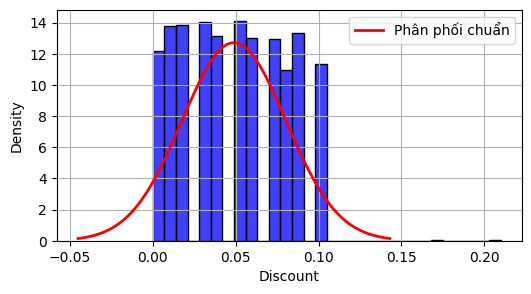

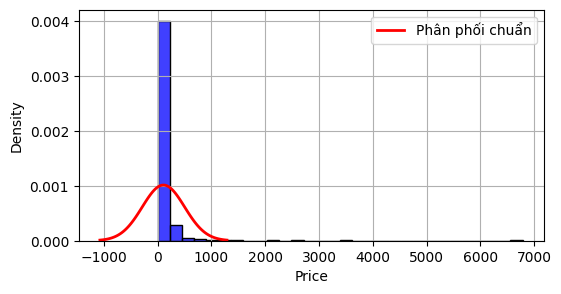

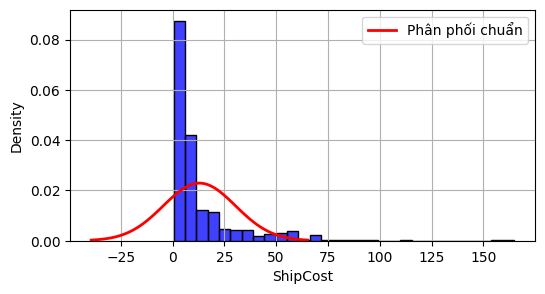

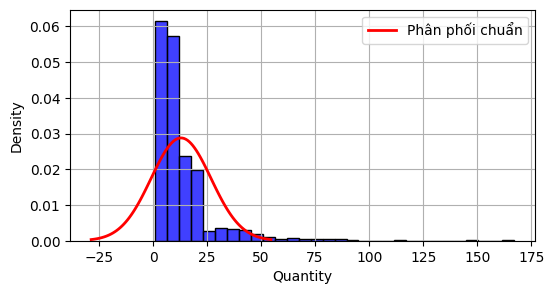

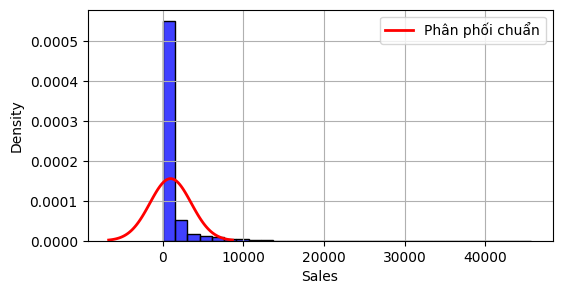

In [14]:
#Câu 8
def createHistogram(input):
    plt.figure(figsize=(6, 3))
    sns.histplot(input, bins=30, kde=False, color='blue', stat='density')
    mean = np.mean(input)
    std_dev = np.std(input)
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
    pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    # Vẽ đường phân phối chuẩn
    plt.plot(x, pdf, color='red', linewidth=2, label='Phân phối chuẩn')
    plt.legend()
    plt.grid(True)
    plt.show()
createHistogram(df['Discount'])
createHistogram(df['Price'])
createHistogram(df['ShipCost'])
createHistogram(df['Quantity'])
createHistogram(df['Sales'])

In [15]:
#Câu 9
x=10.05
z_score = (x - df['Discount'].mean()) / df['Discount'].std()
print(z_score)

318.7241757877475


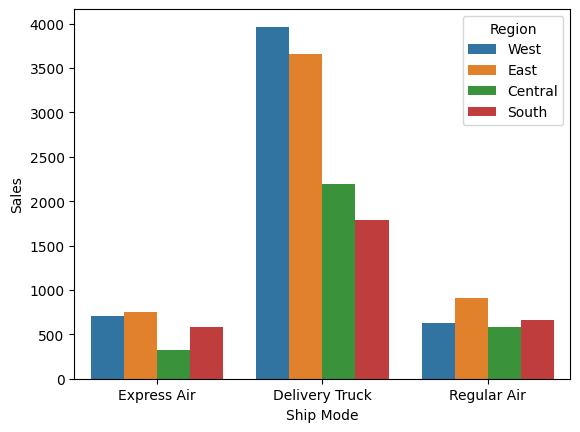

In [16]:
#Câu 10
sns.barplot(x='Ship Mode',y='Sales',hue='Region',data=df,errorbar=None)
plt.show()

In [17]:
X=df[['Price', 'Quantity','ShipCost', 'Sales']].astype(float).values
y=df['Discount'].astype(float).values
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=16)

In [18]:
steps=[('minmaxscaler',MinMaxScaler()),('model',LinearRegression())]

In [19]:
pipe=Pipeline(steps)
model=pipe.fit(X_train,y_train)
model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('model', LinearRegression())])

In [20]:
#Câu 11
from scipy.stats import kurtosis
kurtosis(pd.DataFrame(X_train))

array([163.50959989,  23.74425541,  10.80302908, 109.39953854])

In [21]:
#Câu 12
scaler = MinMaxScaler()
scale_X_train = scaler.fit_transform(pd.DataFrame(X_train))
sqrt_X_train = np.sqrt(scale_X_train)
skew(pd.DataFrame(sqrt_X_train))

array([4.2200665 , 0.94017224, 1.29296318, 2.57041653])

In [22]:
steps2=[('minmaxscaler',MinMaxScaler()),('sqrttransform',FunctionTransformer(np.sqrt)),('model',LinearRegression())]
pipe2=Pipeline(steps2)
model=pipe2.fit(X_train,y_train)
model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sqrttransform', FunctionTransformer(func=<ufunc 'sqrt'>)),
                ('model', LinearRegression())])

In [23]:
#Câu 13
model.named_steps['model'].coef_

array([ 0.02431225,  0.01409403,  0.01034315, -0.03575341])

In [24]:
#Câu 14
model.named_steps['model'].intercept_

0.04499052582156337

In [25]:
y_test_pred=pipe.predict(X_test)
y_train_pred=pipe.predict(X_train)

In [26]:
print('Score or R-Squared: ', model.score(X_train,y_train))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_train,y_train_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_train,y_train_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Score or R-Squared:  0.003584630984168391
Mean Absolute Error:  0.026813960463785765
Mean Squared Error:  0.000977694003223025
Root Mean Squared Error:  0.03126809881049734
Mean Absolute Percentage Error:  17999791605986.797


In [27]:
print('Score or R-Squared: ', model.score(X_test,y_test))
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_test,y_test_pred))

Score or R-Squared:  -0.00021758393366244633
Mean Absolute Error:  0.026782637471591212
Mean Squared Error:  0.0009923965447057124
Root Mean Squared Error:  0.03150232602056097
Mean Absolute Percentage Error:  21722144345784.69


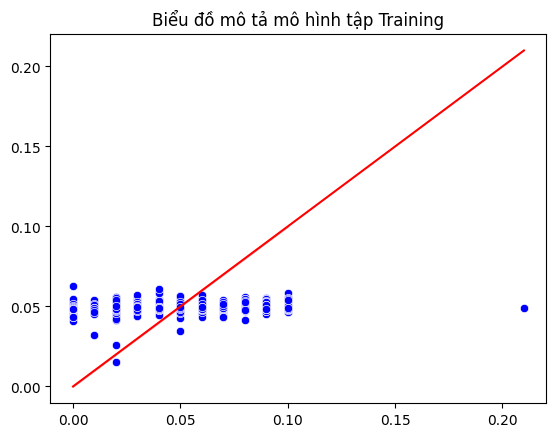

In [28]:
sns.scatterplot(x=y_train.flatten(), y=y_train_pred.flatten(), markers='o', color='b')
sns.lineplot(x=y_train.flatten(), y=y_train.flatten(), markers='s', color='r')
plt.title('Biểu đồ mô tả mô hình tập Training')
plt.show()

In [29]:
steps3=[('minmaxscaler',MinMaxScaler()),('sqrttransform',FunctionTransformer(np.sqrt)),('poly',PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe3=Pipeline(steps2)
model=pipe3.fit(X_train,y_train)
model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('sqrttransform', FunctionTransformer(func=<ufunc 'sqrt'>)),
                ('model', LinearRegression())])

In [30]:
X_train.shape[1]

4

In [31]:
model.named_steps['model'].coef_[0:5]

array([ 0.02431225,  0.01409403,  0.01034315, -0.03575341])